<a href="https://colab.research.google.com/github/DanielGCG/PS-2025.1-XRay/blob/main/Progresso/Enzo%20S/Enzo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import statistics as est
import seaborn as sns
from matplotlib import pyplot as plt

In [76]:
from google.colab import files
upload = files.upload()

Saving campeonatos_futebol_atualizacao.csv to campeonatos_futebol_atualizacao (3).csv


In [77]:
df = pd.read_csv("campeonatos_futebol_atualizacao.csv")
pd.set_option('display.max_columns', None)
df.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiro de meta 1,Tiro de meta 2,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


#Análise exploratória de dados


## Tiros-livres

### Verificação de Coerência

A primeira verificação lógica é que o número de Tiros Livres recebidos por um time não deve ultrapassar a soma das Faltas cometidas + Impedimentos do time adversário. Isso se baseia no fato de que:

* A maioria dos tiros livres resulta de faltas ou
impedimentos.

* Há raros casos de recuo ao goleiro, mas são exceções e não justificam valores muito altos.

* Nem todas as faltas geram tiros livres (ex: vantagem ou pênalti).

In [78]:
df.loc[df['Tiros-livres 1'] > df['Impedimentos 2'] + df['Faltas 2'] ,['Tiros-livres 1', 'Impedimentos 2', 'Faltas 2']].shape
#com o '.shape', percebe-se que são 28 linhas com dados incoerentes, apesar que os valores são próximos

(31, 3)

In [79]:
df.loc[df['Tiros-livres 2'] > df['Impedimentos 1'] + df['Faltas 1'], ['Tiros-livres 2', 'Impedimentos 1', 'Faltas 1']].shape

(28, 3)

Foram encontrados 31 registros incoerentes para o time 1 e 28 para o time 2, em que a quantidade de Tiros-Livres é maior que a soma de impedimento mais falta. Como não é impossível, apenas improvável que haja recuos para o goleiro, então esse caso pode acontecer,

### Proporção de Tiros Livres por Faltas + Impedimentos

Para entender melhor a relação entre essas variáveis, criamos a variável "proporcao_tiro_falta" para as estatísticas do time 1 e "proporcao" para o time 2 e analisamos o seu histograma

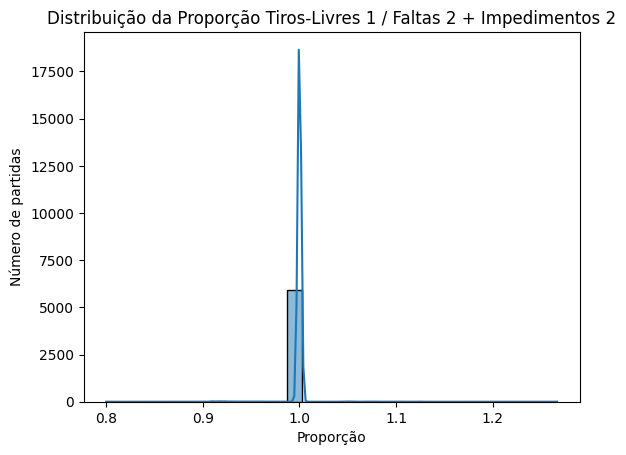

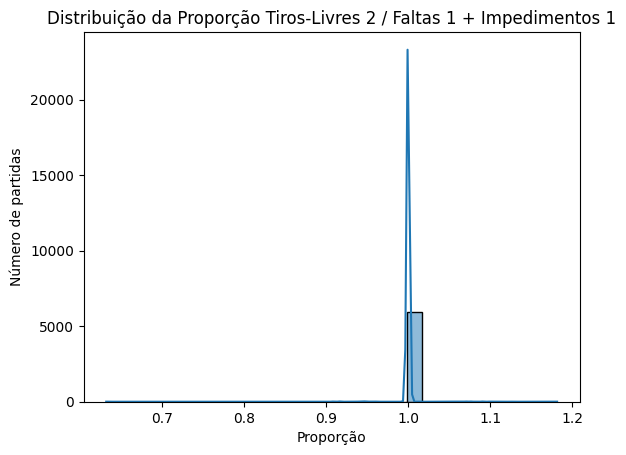

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
df['proporcao_tiro_falta'] = df['Tiros-livres 1'] / (df['Faltas 2'] + df['Impedimentos 2'])
sns.histplot(df['proporcao_tiro_falta'], bins=30, kde=True)
plt.title('Distribuição da Proporção Tiros-Livres 1 / Faltas 2 + Impedimentos 2')
plt.xlabel('Proporção')
plt.ylabel('Número de partidas')
plt.show()
df['proporcao'] = df['Tiros-livres 2'] / (df['Faltas 1'] + df['Impedimentos 1'])
sns.histplot(df['proporcao'], bins=30, kde=True)
plt.title('Distribuição da Proporção Tiros-Livres 2 / Faltas 1 + Impedimentos 1')
plt.xlabel('Proporção')
plt.ylabel('Número de partidas')
plt.show()
#analisando o gráfico, percebe-se que a relação entre Tiros Livre e (Faltas + Impedimento) é quase 1 para 1 como o esperado
#Note que quando o time 2 comete falta ou impedimento, o time 1 é quem cobra

Os gráficos mostraram uma distribuição próxima de 1 para ambos os casos, o que confirma a suposição teórica da relação entre as variáveis.

### Investigando o Impacto Isolado das Faltas

Analisamos também a relação de Tiros-Livres apenas com Faltas

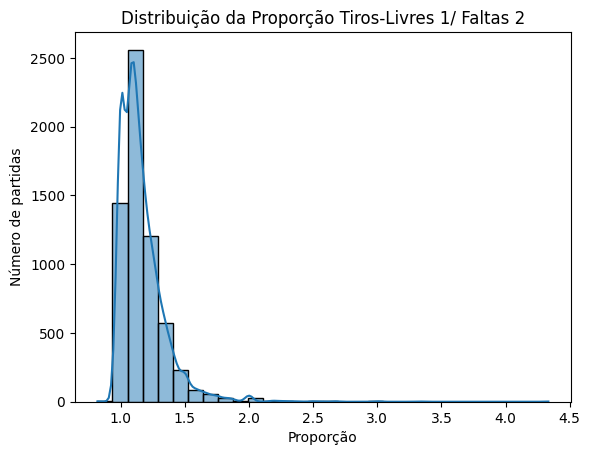

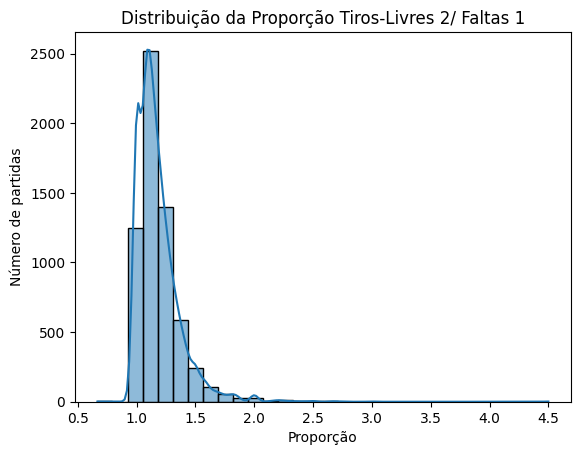

In [81]:
df['proporcao_tiro_falta'] = df['Tiros-livres 1'] / (df['Faltas 2'])
sns.histplot(df['proporcao_tiro_falta'], bins=30, kde=True)
plt.title('Distribuição da Proporção Tiros-Livres 1/ Faltas 2')
plt.xlabel('Proporção')
plt.ylabel('Número de partidas')
plt.show()
df['proporcao2'] = df['Tiros-livres 2'] / (df['Faltas 1'])
sns.histplot(df['proporcao2'], bins=30, kde=True)
plt.title('Distribuição da Proporção Tiros-Livres 2/ Faltas 1')
plt.xlabel('Proporção')
plt.ylabel('Número de partidas')
plt.show()
#Nesse caso, a estimativa já não é tão boa quanto o outro, o que leva a crer que a substituição dos valores nulos de Tiros Livres seja melhor com (faltas + impedimentos)

A estimativa foi menos precisa. Portanto, para preencher valores nulos de Tiros-livres, a soma de Faltas + Impedimentos parece ser uma melhor escolha de imputação.

### Análise de Nulos

In [82]:
print(df['Tiros-livres 1'].isnull().sum(),
df['Faltas 2'].isnull().sum(),
df['Impedimentos 2'].isnull().sum())


21470 2322 2774


In [83]:
print(df['Tiros-livres 2'].isnull().sum(),
df['Faltas 1'].isnull().sum(),
df['Impedimentos 1'].isnull().sum())


21470 2322 2774


A quantidade de valores ausentes em Tiros-Livres é muito maior do que nas colunas de Faltas e Impedimentos, o que valida a ideia de usar estas como estimativas para imputação.

### Comparação das Distribuições

Text(0.5, 1.0, 'Tiros Livres 1')

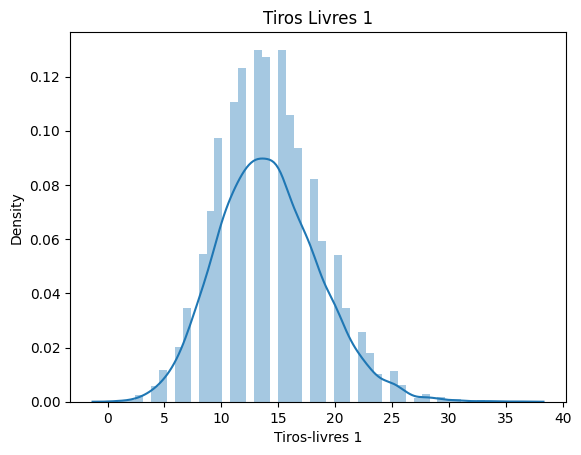

In [84]:
sns.distplot(df['Tiros-livres 1']).set_title('Tiros Livres 1')

Text(0.5, 1.0, 'F2 + I2')

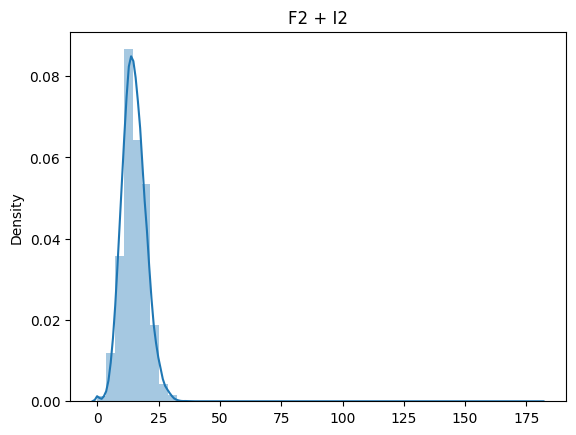

In [85]:
sns.distplot(df['Impedimentos 2']+ df['Faltas 2']).set_title('F2 + I2')

Text(0.5, 1.0, 'Tiros Livres 2')

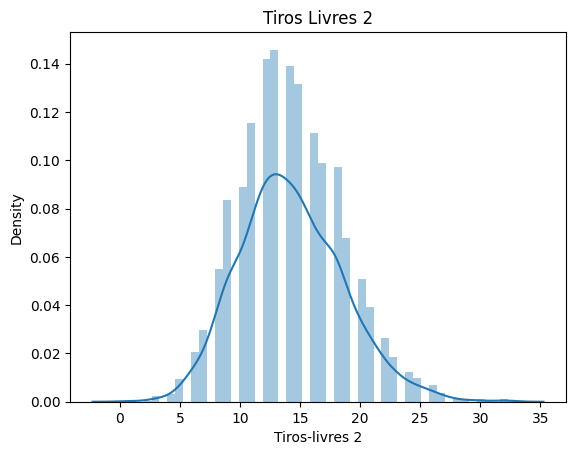

In [86]:
sns.distplot(df['Tiros-livres 2']).set_title('Tiros Livres 2')

Text(0.5, 1.0, 'F1 + I1')

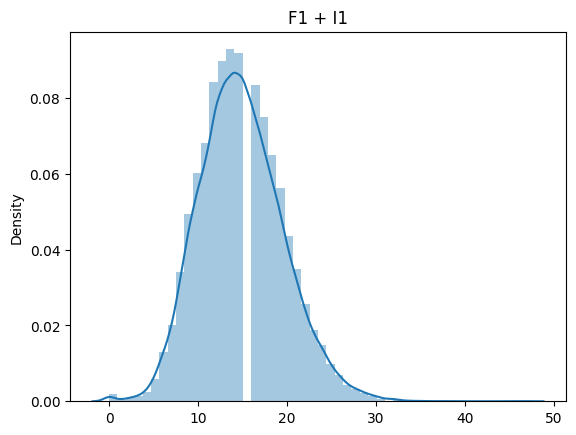

In [87]:
sns.distplot(df['Impedimentos 1']+ df['Faltas 1']).set_title('F1 + I1')

As distribuições são semelhantes, porém observamos outliers em Faltas, especialmente um valor de 180 faltas, que foi identificado como um outlier claro, o que faz com que o gráfico de faltas seja mais extenso no eixo x

In [88]:
df['Faltas 1'].describe() #máximo de 46
df['Faltas 2'].describe() #máximo de 180, claro outlier

,Faltas 2
count,25394.000000
mean,12.946444
std,4.608542
min,0.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,180.000000


In [89]:
df['Impedimentos 1'].describe() #max 23
df['Impedimentos 2'].describe() #max 15

,Impedimentos 2
count,24942.000000
mean,1.968527
std,1.681298
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,15.000000


### Tratamento de Outliers e Preenchimento de Nulos

Após considerar a análise, optamos por substituir os valores nulos de Tiros-livres pela soma de Faltas + Impedimentos.

In [90]:
#após tratamento de dados de Impedimentos e Faltas, podemos substituir os valores nulos de Tiros livres, pela soma dos dois, pelos argumentos mostrados acima
# Cria a soma das colunas auxiliares
substituto1 = df['Faltas 2'] + df['Impedimentos 2']

# Substitui apenas onde Tiros-livres 1 é nulo
df['Tiros-livres 1'] = df['Tiros-livres 1'].fillna(substituto1) #colocar (inplace = True) para substituir nos df
df['Tiros-livres 1'].describe()
print("quantidade de Tiros-Livres 1 nulos:",df['Tiros-livres 1'].isnull().sum())

substituto2 = df['Faltas 1'] + df['Impedimentos 1']

# Substitui apenas onde Tiros-livres 2 é nulo
df['Tiros-livres 2'] = df['Tiros-livres 2'].fillna(substituto2) #colocar (inplace = True) para substituir nos df
df['Tiros-livres 2'].describe()
print("quantidade de Tiros-Livres 2 nulos:",df['Tiros-livres 2'].isnull().sum())

quantidade de Tiros-Livres 1 nulos: 2541
quantidade de Tiros-Livres 2 nulos: 2541


A substituição reduziu significativamente os valores ausentes, mantendo a coerência com a distribuição dos dados.

## Laterais

### Correlação com Outras Variáveis



Antes de aplicar qualquer estratégia de imputação, é importante entender como a variável Laterais se relaciona com as demais variáveis do conjunto.

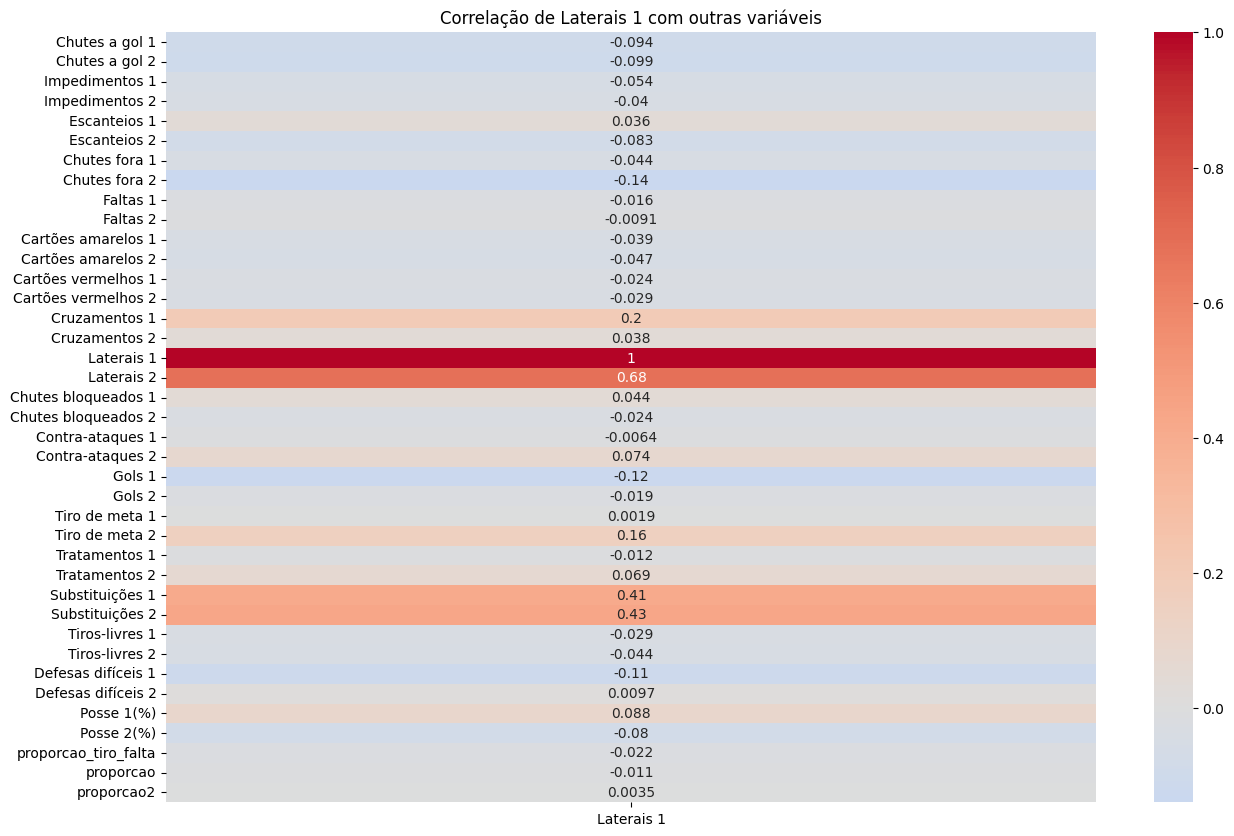

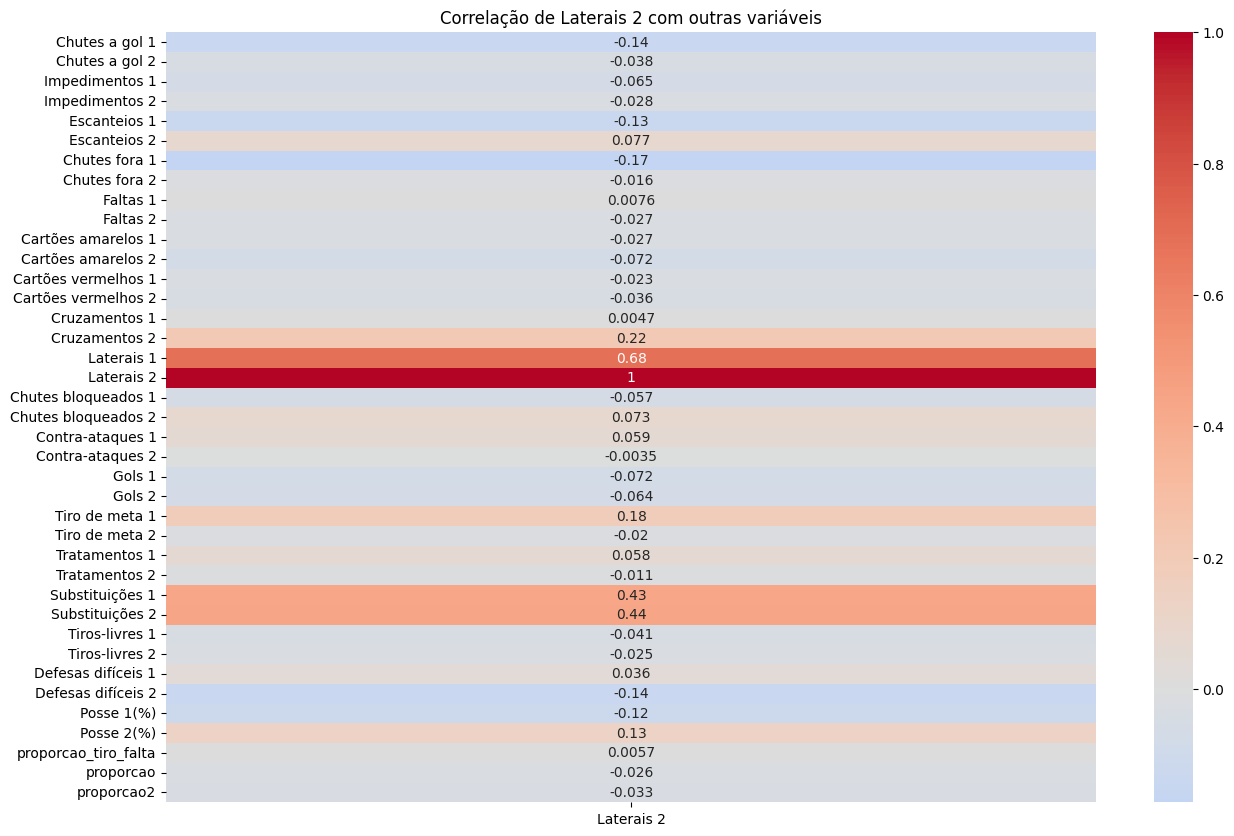

In [91]:

# Seleciona apenas colunas numéricas
dados_numericos = df.select_dtypes(include='number')

# Cria a matriz de correlação
correlacao = dados_numericos.corr()

# Visualiza a correlação com heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao[['Laterais 1']], annot=True, cmap='coolwarm', center=0)
plt.title('Correlação de Laterais 1 com outras variáveis')
plt.show()

# Repete para o time 2
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao[['Laterais 2']], annot=True, cmap='coolwarm', center=0)
plt.title('Correlação de Laterais 2 com outras variáveis')
plt.show()
#heatmap para saber a relação de laterais com outras variáveis

Observações:

Diferente de variáveis como Tiros-Livres, Laterais não apresenta uma correlação forte ou direta com outras métricas do jogo.

Nem mesmo variáveis intuitivamente relacionadas, como Posse de Bola, Substituições ou Faltas, mostraram correlação significativa.

Isso indica que Laterais é mais imprevisível e depende do estilo de jogo, do adversário e do contexto tático.

### Distribuição de Laterais por Time

Unimos os dados de Laterais 1 e Laterais 2 em um único dataframe para analisar a distribuição por time:

In [92]:
laterais_1 = df[['Time 1', 'Laterais 1']].rename(columns={'Time 1': 'Time', 'Laterais 1': 'Laterais'})
laterais_2 = df[['Time 2', 'Laterais 2']].rename(columns={'Time 2': 'Time', 'Laterais 2': 'Laterais'})
laterais_total = pd.concat([laterais_1, laterais_2])


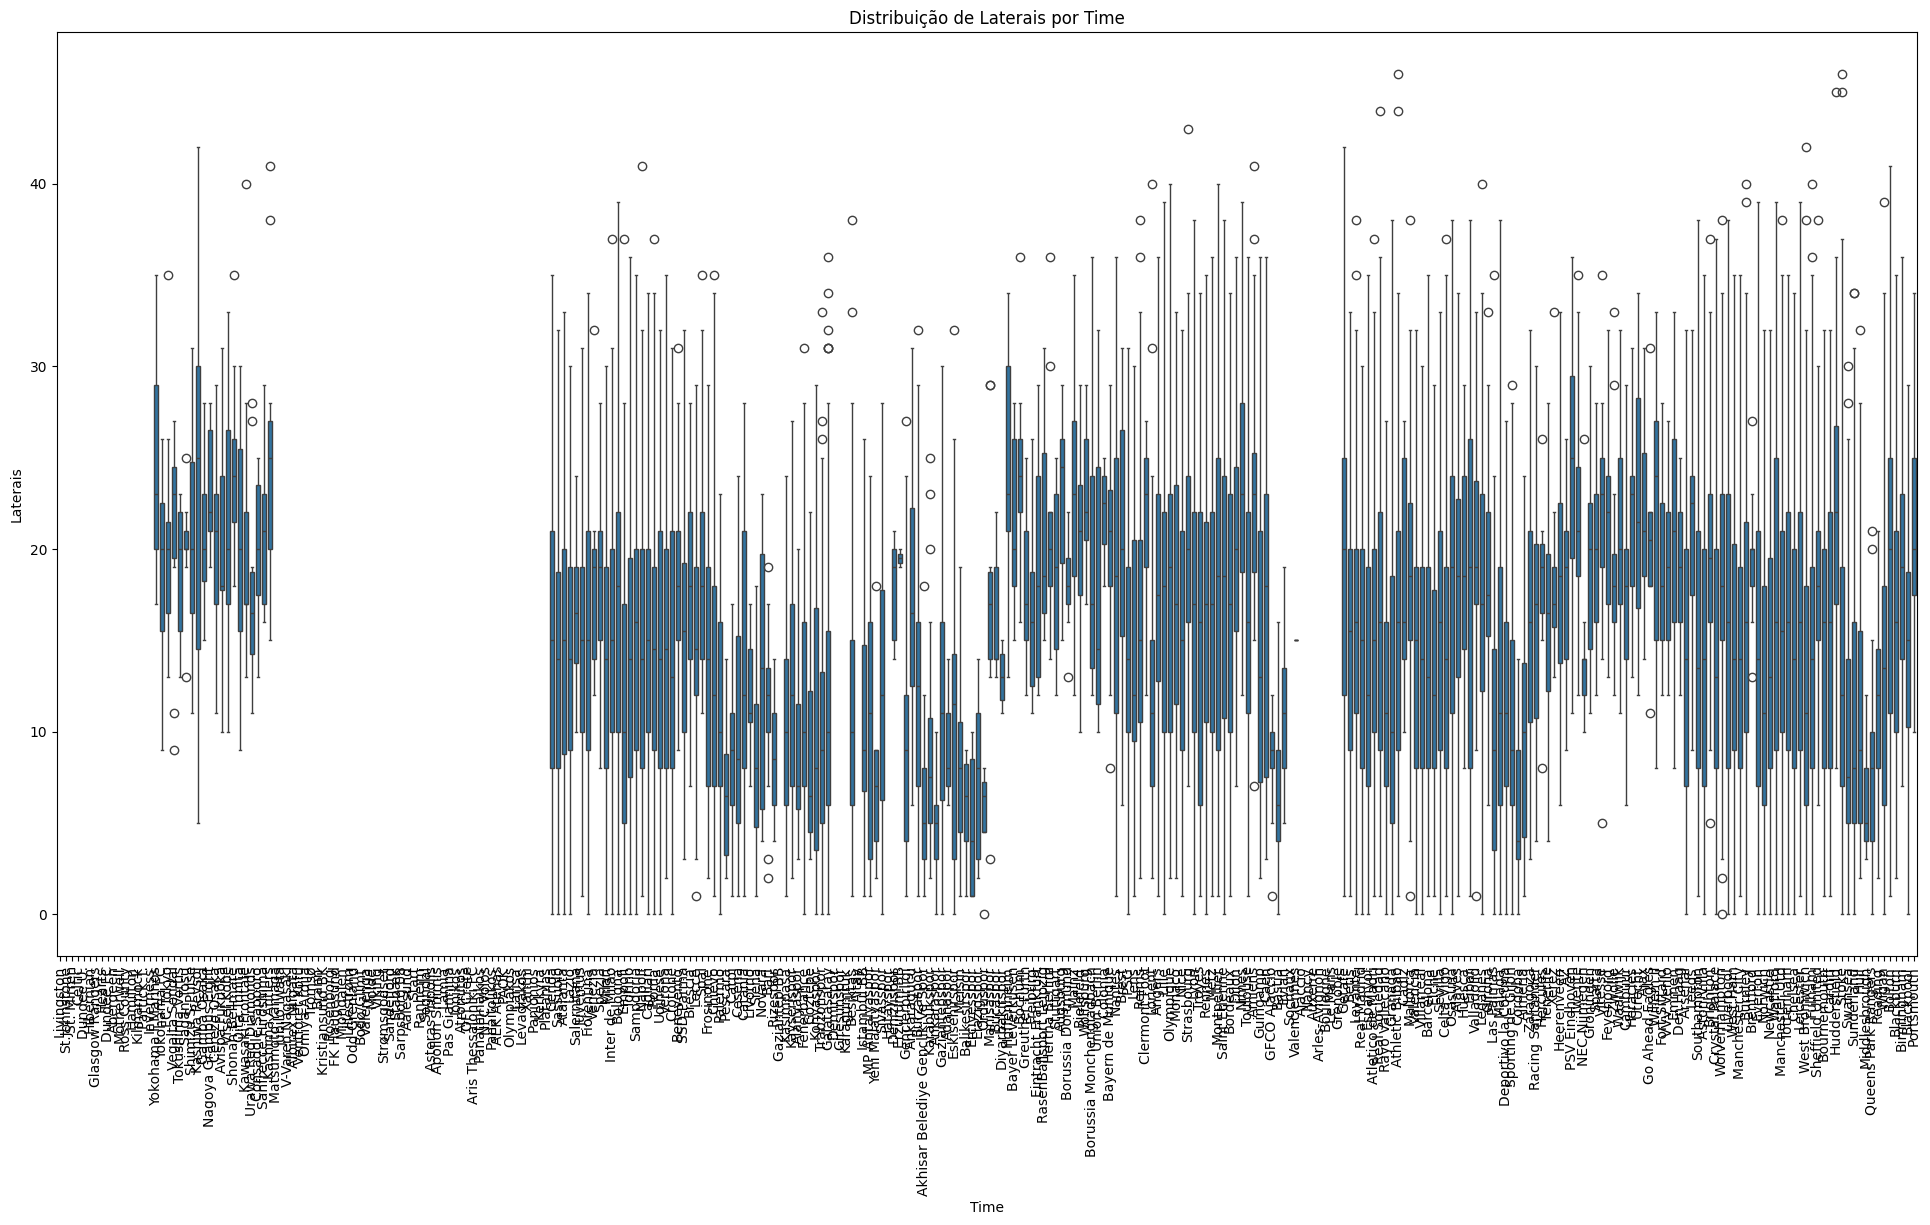

In [93]:
laterais_total = laterais_total.reset_index(drop=True)
plt.figure(figsize=(24,12))
sns.boxplot(x='Time', y='Laterais', data=laterais_2)
plt.xticks(rotation=90)
plt.title('Distribuição de Laterais por Time')
plt.show()
#tentativa de analisar se os laterais dependem do time ou não

###Tentativa de Imputação por Partida Anterior

 Foi testada a hipótese de preencher os valores ausentes de Laterais com base na última partida do mesmo time.

No entanto:
  Os times que possuem valores ausentes de Laterais apresentam ausência sistemática, ou seja, o dado está faltando em todas as partidas daquele time.

### Conclusão

Como não há um forte preditor, valores nulos em Laterais devem ser tratados com cuidados estatísticos como computação pela mediana ou pela média geral por time. No nosso caso, foi usado a mediana geral

##Cruzamentos

###  Investigando a Correlação dos Cruzamentos com Outras Variáveis

Inicialmente, analisamos como os Cruzamentos 1 se correlacionam com outras variáveis numéricas do dataset.

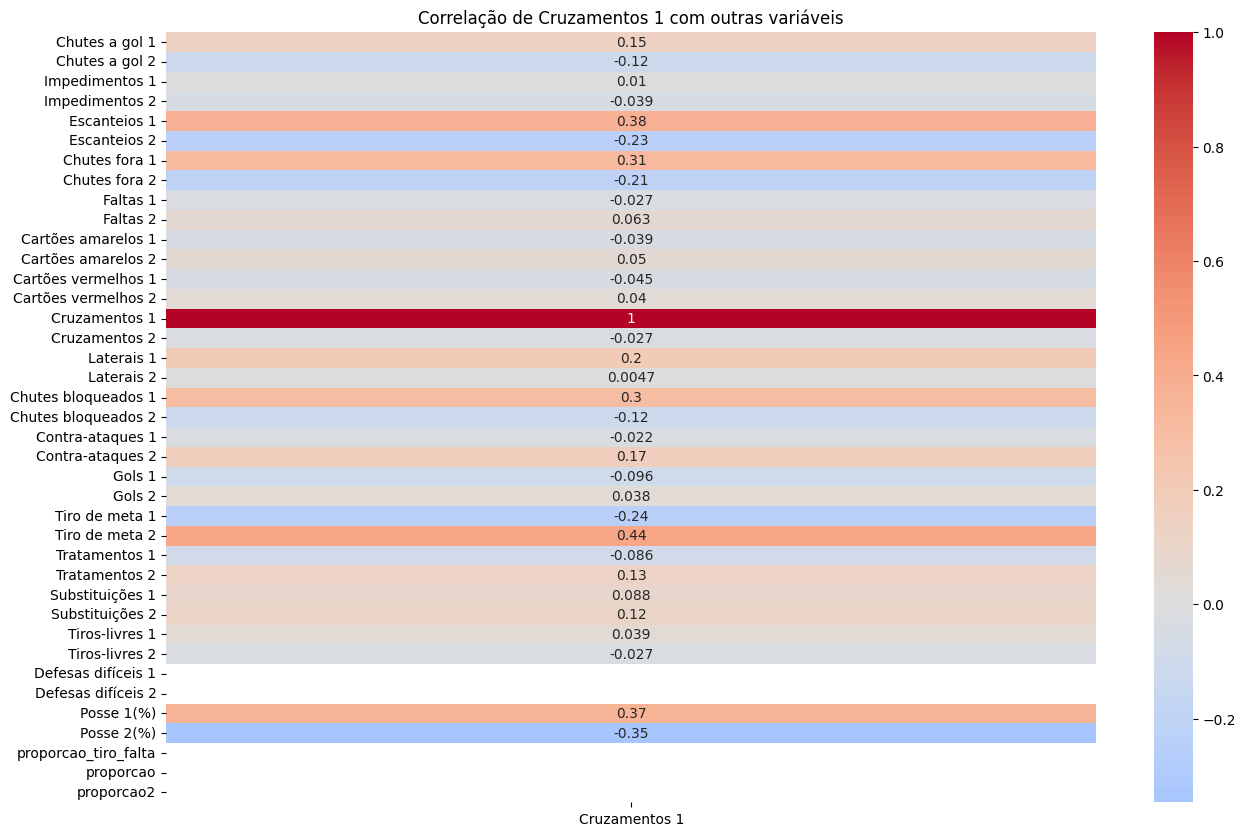

In [94]:
# Seleciona apenas colunas numéricas
dados_numericos = df.select_dtypes(include='number')

# Cria a matriz de correlação
correlacao = dados_numericos.corr()

# Visualiza a correlação com heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao[['Cruzamentos 1']], annot=True, cmap='coolwarm', center=0)
plt.title('Correlação de Cruzamentos 1 com outras variáveis')
plt.show()

Observação: A correlação dos cruzamentos com outras variáveis é relativamente baixa. Isso já sugere que o número de cruzamentos depende de múltiplos fatores e não tem forte relação linear com uma variável isolada.



### Tentativa de Estimativa de Cruzamentos com Base em Derivadas

Assumimos que os cruzamentos podem ser classificados em:

Certos → quando geram chutes a gol, chutes fora, chutes bloqueados. (bola chega no atacante)

Errados → quando resultam em escanteios, laterais, contra-ataques ou tiros de meta. (bola não chega no atacante)

In [95]:
df['Cruzamentos certos 1'] = df['Chutes a gol 1'] + df['Chutes fora 1'] + df['Chutes bloqueados 1'] #+ df['Gols 1']
df['Cruzamentos errados 1'] = df['Contra-ataques 2'] + df['Escanteios 1'] + df['Laterais 2'] + df['Tiro de meta 2']
df['Cruzamento total 1'] = df['Cruzamentos certos 1']  + df['Cruzamentos errados 1']


Analisando a Correlação entre Cruzamentos e Ações Derivadas

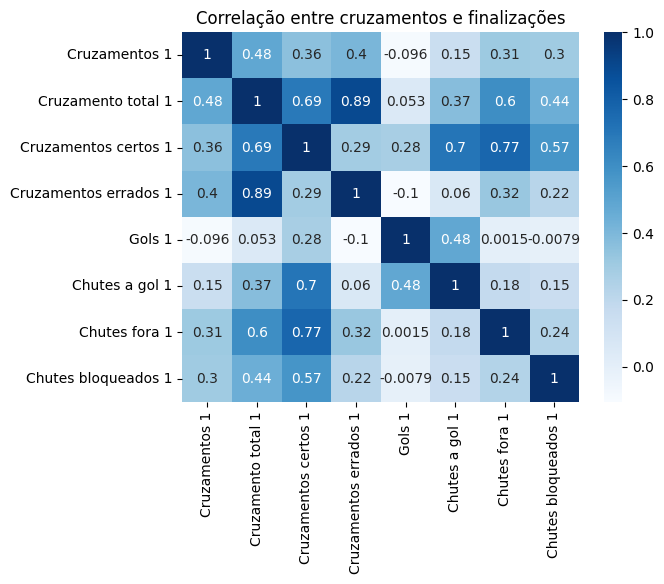

In [96]:
colunas_interesse = ['Cruzamentos 1','Cruzamento total 1','Cruzamentos certos 1', 'Cruzamentos errados 1', 'Gols 1', 'Chutes a gol 1', 'Chutes fora 1', 'Chutes bloqueados 1']
sns.heatmap(df[colunas_interesse].corr(), annot=True, cmap='Blues')
plt.title("Correlação entre cruzamentos e finalizações")
plt.show()

Ainda que algumas correlações apareçam (ex: chutes e cruzamentos certos), os valores não são suficientemente fortes para justificar o uso da variável Cruzamentos 1 como preditora.

 ### Análise Proporcional de Resultados por Cruzamento

Foram criadas métricas de proporção entre resultados ofensivos/defensivos e o total de cruzamentos:

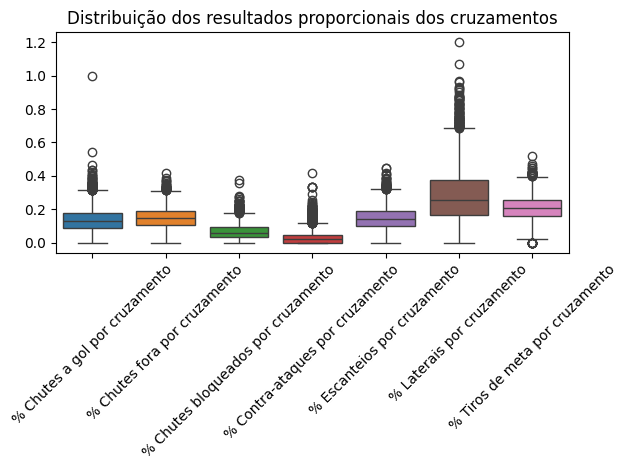

In [97]:
df['% Chutes a gol por cruzamento'] = df['Chutes a gol 1'] / df['Cruzamento total 1']
df['% Chutes fora por cruzamento'] = df['Chutes fora 1'] / df['Cruzamento total 1']
df['% Chutes bloqueados por cruzamento'] = df['Chutes bloqueados 1'] / df['Cruzamento total 1']
df['% Contra-ataques por cruzamento'] = df['Contra-ataques 2'] / df['Cruzamento total 1']
df['% Escanteios por cruzamento'] = df['Escanteios 1'] / df['Cruzamento total 1']
df['% Laterais por cruzamento'] = df['Laterais 1'] / df['Cruzamento total 1']
df['% Tiros de meta por cruzamento'] = df['Tiro de meta 2'] / df['Cruzamento total 1']
colunas_proporcionais = [
    '% Chutes a gol por cruzamento',
    '% Chutes fora por cruzamento',
    '% Chutes bloqueados por cruzamento',
    '% Contra-ataques por cruzamento',
    '% Escanteios por cruzamento',
    '% Laterais por cruzamento',
    '% Tiros de meta por cruzamento'
]

sns.boxplot(data=df[colunas_proporcionais])
plt.xticks(rotation=45)
plt.title("Distribuição dos resultados proporcionais dos cruzamentos")
plt.tight_layout()
plt.show()


A análise mostra alta variabilidade, o que reforça a ideia de que cruzamentos dependem de múltiplos fatores e não têm padrão estável ou previsível.

In [98]:
df[colunas_proporcionais].mean().sort_values(ascending=False)


,0
% Laterais por cruzamento,0.282896
% Tiros de meta por cruzamento,0.208859
% Chutes fora por cruzamento,0.148216
% Escanteios por cruzamento,0.145332
% Chutes a gol por cruzamento,0.136725
% Chutes bloqueados por cruzamento,0.065806
% Contra-ataques por cruzamento,0.032513


### Comparação com Limites Estimados

#### Limite Superior Estimado

Soma das possíveis consequências de cruzamentos:

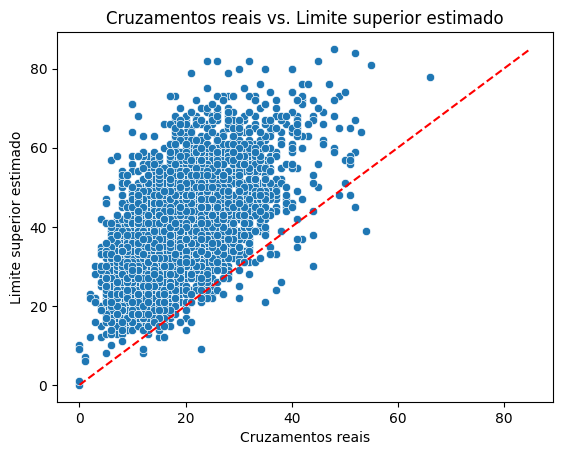

In [99]:
df['limite_superior'] = (df['Chutes a gol 1'] + df['Escanteios 1'] + df['Chutes fora 1']+ df['Chutes bloqueados 1'] + df['Laterais 1'] + df['Contra-ataques 2'] + df['Tiro de meta 2'])
sns.scatterplot(x='Cruzamentos 1', y='limite_superior', data=df)
plt.title("Cruzamentos reais vs. Limite superior estimado")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Limite superior estimado")
plt.plot([0, df[['Cruzamentos 1', 'limite_superior']].max().max()],
         [0, df[['Cruzamentos 1', 'limite_superior']].max().max()],
         'r--')  # linha de referência
plt.show()


#### Limite Inferior Estimado

Considerando apenas os piores cenários:

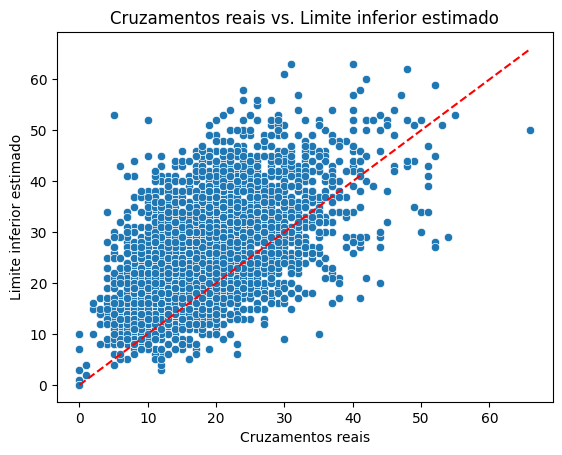

,Cruzamentos 1,limite_inferior
Cruzamentos 1,1.000000,0.538528
limite_inferior,0.538528,1.000000


In [100]:
df['limite_inferior'] = df['Tiro de meta 2']+ df['Escanteios 1'] + df['Laterais 1'] + df['Contra-ataques 2']
#maioria dos tiros de meta 2 seriam derivados dos chutes fora, chutes bloqueados gerariam escanteios e contra ataques
sns.scatterplot(x='Cruzamentos 1', y='limite_inferior', data=df)
plt.title("Cruzamentos reais vs. Limite inferior estimado")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Limite inferior estimado")
plt.plot([0, df[['Cruzamentos 1', 'limite_inferior']].max().max()],
         [0, df[['Cruzamentos 1', 'limite_inferior']].max().max()],
         'r--')  # linha de referência
plt.show()
df[['Cruzamentos 1', 'limite_inferior']].corr()

#### Média dos Limites

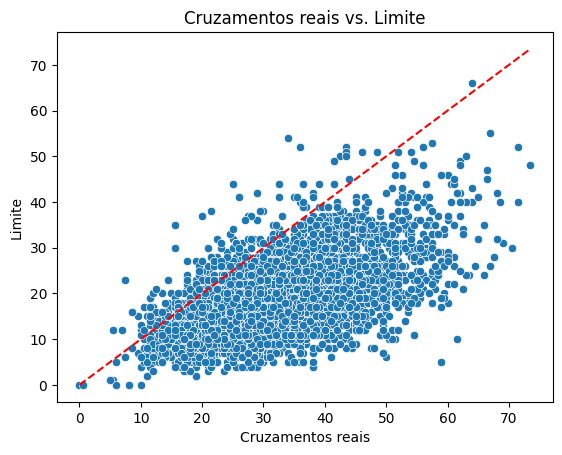

,limite,Cruzamentos 1
limite,1.000000,0.568135
Cruzamentos 1,0.568135,1.000000


In [101]:
df['limite'] = (df['limite_superior'] + df['limite_inferior'])/2
sns.scatterplot(x='limite', y='Cruzamentos 1', data=df)
plt.title("Cruzamentos reais vs. Limite")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Limite")
plt.plot([0, df[['limite', 'Cruzamentos 1']].max().max()],
         [0, df[['limite', 'Cruzamentos 1']].max().max()],
         'r--')  # linha de referência
plt.show()
df[['limite', 'Cruzamentos 1']].corr()

Resultado: As correlações com os limites estimados também são fracas, e os pontos estão muito dispersos.

### Tentativa de Previsão de Cruzamentos com Cruzamentos Certos e Errados

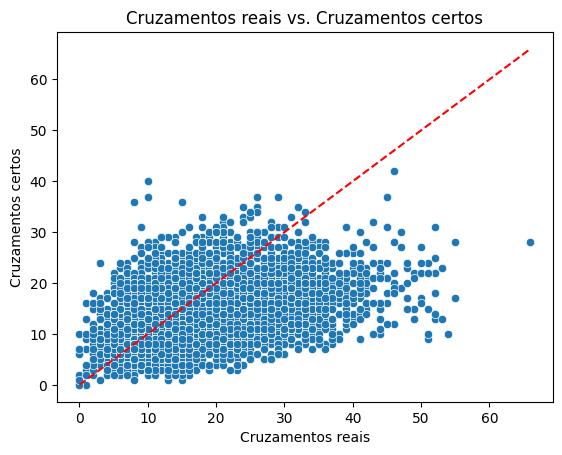

,cruzamento_c,Cruzamentos 1
cruzamento_c,1.000000,0.357831
Cruzamentos 1,0.357831,1.000000


In [102]:
#possíveis derivadas de cruzamentos certos: chute a gol, chutes fora, chutes bloqueados
#possíveis derivadas de cruzamentos errados: laterais, escanteio e tiro de meta 2
#voltando a essa hipótese, vamos ver como se comportam os dois tipos de cruzamentos
#Primeiro analisando a distribuição dos cruzamentos certos com os cruzamentos totais
df['cruzamento_c'] = df['Chutes a gol 1'] + df['Chutes fora 1'] + df['Chutes bloqueados 1']
sns.scatterplot(x='Cruzamentos 1', y='cruzamento_c', data=df)
plt.title("Cruzamentos reais vs. Cruzamentos certos")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Cruzamentos certos")
plt.plot([0, df[['Cruzamentos 1', 'cruzamento_c']].max().max()],
         [0, df[['Cruzamentos 1', 'cruzamento_c']].max().max()],
         'r--')  # linha de referência
plt.show()
df[['cruzamento_c', 'Cruzamentos 1']].corr()

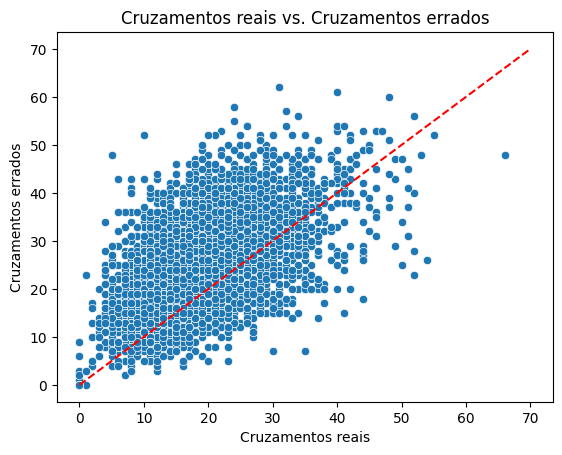

,cruzamento_e,Cruzamentos 1
cruzamento_e,1.000000,0.526406
Cruzamentos 1,0.526406,1.000000


In [103]:
#analisando a distribuição dos cruzamentos errados com os cruzamentos totais
df['cruzamento_e'] = df['Laterais 1'] + df['Escanteios 1'] + df['Tiro de meta 2']
sns.scatterplot(x='Cruzamentos 1', y='cruzamento_e', data=df)
plt.title("Cruzamentos reais vs. Cruzamentos errados")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Cruzamentos errados")
plt.plot([0, df[['Cruzamentos 1', 'cruzamento_e']].max().max()],
         [0, df[['Cruzamentos 1', 'cruzamento_e']].max().max()],
         'r--')  # linha de referência
plt.show()
df[['cruzamento_e', 'Cruzamentos 1']].corr()

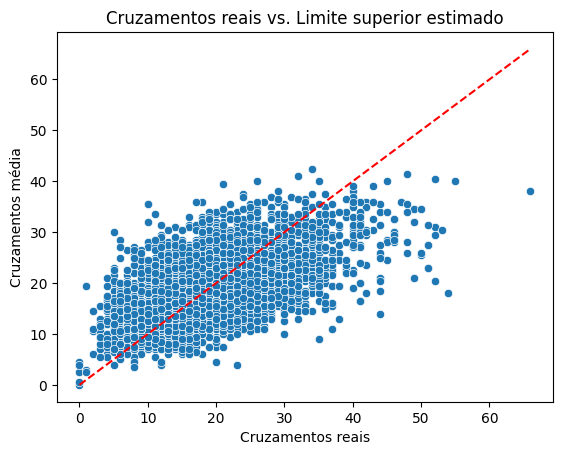

,media,Cruzamentos 1
media,1.000000,0.555809
Cruzamentos 1,0.555809,1.000000


In [104]:
df['media'] = (df['cruzamento_e'] + df['cruzamento_c'])/2
sns.scatterplot(x='Cruzamentos 1', y='media', data=df)
plt.title("Cruzamentos reais vs. Limite superior estimado")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Cruzamentos média")
plt.plot([0, df[['Cruzamentos 1', 'media']].max().max()],
         [0, df[['Cruzamentos 1', 'media']].max().max()],
         'r--')  # linha de referência
plt.show()
df[['media', 'Cruzamentos 1']].corr()

Conclusão Final: As correlações obtidas são fracas. A variabilidade nos cruzamentos (certos ou errados) continua alta mesmo considerando possíveis desdobramentos lógicos.

###Decisão Final

Devido à baixa correlação com outras variáveis e à alta variabilidade de resultados, conclui-se que a variável Cruzamentos não contribui de maneira significativa para a análise ou modelos preditivos, sendo, portanto, removida do dataset final.